<a href="https://colab.research.google.com/github/lia-ang/BME3053C-Spring-2025/blob/main/lessons-solved/homework/HW7_ALiang.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, ifft
from scipy.signal import find_peaks

In [ ]:
def generate_ecg_data(duration, sampling_rate=250):
    def generate_ecg_pulse(duration, sampling_rate):
        t = np.linspace(0, duration, int(duration * sampling_rate), endpoint=False)
        # P wave
        p_wave = 0.15 * np.sin(2 * np.pi * 1.5 * t) * np.exp(-((t - 0.1) ** 2) / 0.005)
        # QRS complex
        qrs_complex = np.zeros_like(t)
        qrs_complex[(t > 0.2) & (t < 0.25)] = -0.3
        qrs_complex[(t > 0.25) & (t < 0.3)] = 1.0
        qrs_complex[(t > 0.3) & (t < 0.35)] = -0.2
        # T wave
        t_wave = 0.3 * np.sin(2 * np.pi * 0.75 * (t - 0.45)) * np.exp(-((t - 0.45) ** 2) / 0.015)
        # Combine all components
        pulse = p_wave + qrs_complex + t_wave
        # Add high-frequency noise to the pulse
        high_freq_noise = 0.05 * np.sin(2 * np.pi * 50 * t)
        pulse += high_freq_noise
        return pulse


    # Generate a single ECG pulse
    single_pulse = generate_ecg_pulse(0.8, sampling_rate)


    # Repeat the pulse to create a longer ECG signal
    num_pulses = int(duration / 0.8)
    ecg_data = np.tile(single_pulse, num_pulses)


    # Add more noise to make it more realistic
    noise = np.random.normal(0, 0.05, len(ecg_data))  # Increased noise amplitude
    ecg_data += noise


    # Add baseline wander
    t = np.linspace(0, duration, len(ecg_data), endpoint=False)
    baseline_wander = 0.1 * np.sin(2 * np.pi * 0.1 * t)
    ecg_data += baseline_wander


    # Add power line interference
    power_line_interference = 0.05 * np.sin(2 * np.pi * 60 * t)  # 60 Hz interference
    ecg_data += power_line_interference


    # Ensure the length of ecg_data matches the desired duration
    ecg_data = ecg_data[:int(duration * sampling_rate)]


    return ecg_data


ecg_data = generate_ecg_data(10, 250)
def generate_ecg_data(duration, sampling_rate=250):
    def generate_ecg_pulse(duration, sampling_rate):
        t = np.linspace(0, duration, int(duration * sampling_rate), endpoint=False)
        # P wave
        p_wave = 0.15 * np.sin(2 * np.pi * 1.5 * t) * np.exp(-((t - 0.1) ** 2) / 0.005)
        # QRS complex
        qrs_complex = np.zeros_like(t)
        qrs_complex[(t > 0.2) & (t < 0.25)] = -0.3
        qrs_complex[(t > 0.25) & (t < 0.3)] = 1.0
        qrs_complex[(t > 0.3) & (t < 0.35)] = -0.2
        # T wave
        t_wave = 0.3 * np.sin(2 * np.pi * 0.75 * (t - 0.45)) * np.exp(-((t - 0.45) ** 2) / 0.015)
        # Combine all components
        pulse = p_wave + qrs_complex + t_wave
        # Add high-frequency noise to the pulse
        high_freq_noise = 0.05 * np.sin(2 * np.pi * 50 * t)
        pulse += high_freq_noise
        return pulse

    # Generate a single ECG pulse
    single_pulse = generate_ecg_pulse(0.8, sampling_rate)

    # Repeat the pulse to create a longer ECG signal
    num_pulses = int(duration / 0.8)
    ecg_data = np.tile(single_pulse, num_pulses)

    # Add more noise to make it more realistic
    noise = np.random.normal(0, 0.05, len(ecg_data))  # Increased noise amplitude
    ecg_data += noise

    # Add baseline wander
    t = np.linspace(0, duration, len(ecg_data), endpoint=False)
    baseline_wander = 0.1 * np.sin(2 * np.pi * 0.1 * t)
    ecg_data += baseline_wander

    # Add power line interference
    power_line_interference = 0.05 * np.sin(2 * np.pi * 60 * t)  # 60 Hz interference
    ecg_data += power_line_interference

    # Ensure the length of ecg_data matches the desired duration
    ecg_data = ecg_data[:int(duration * sampling_rate)]

    return ecg_data

ecg_data = generate_ecg_data(10, 250)

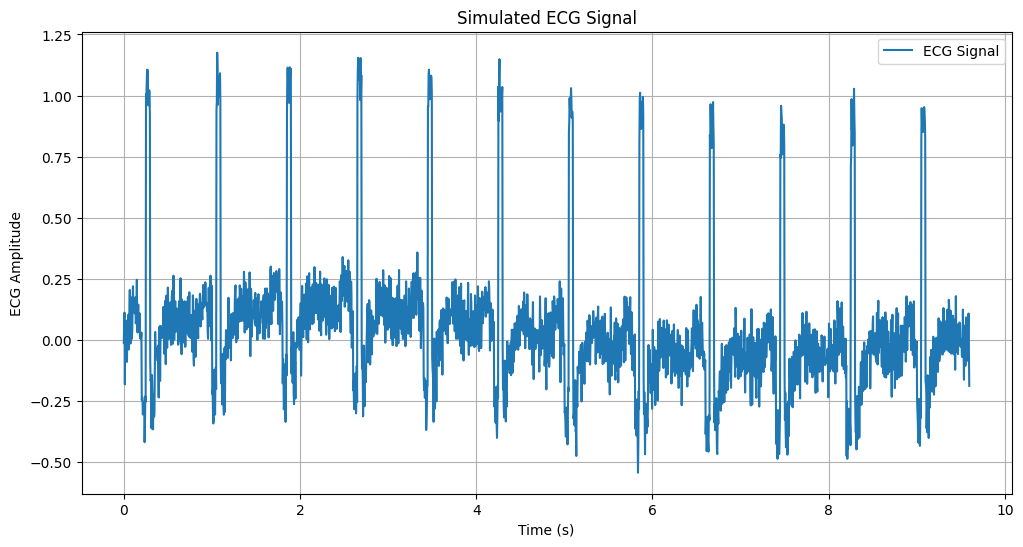

In [ ]:
#Task 1
# Visualize the ECG signal with proper time axis
sampling_rate = 250  # Hz
time = np.arange(len(ecg_data)) / sampling_rate  # Compute time in seconds

plt.figure(figsize=(12, 6))
plt.plot(time, ecg_data, label="ECG Signal")
plt.xlabel("Time (s)")  # Label x-axis
plt.ylabel("ECG Amplitude")  # Label y-axis
plt.title("Simulated ECG Signal")  # Add title
plt.grid(True)  # Add grid lines
plt.legend()  # Add legend
plt.show()

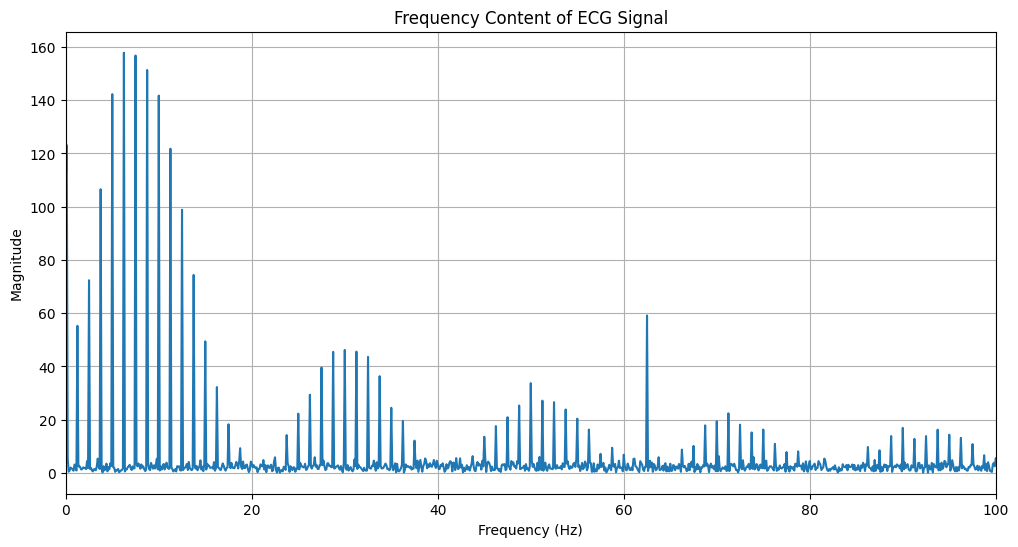

In [ ]:
#Task 2
# Compute and plot Fourier transform of ECG signal to explore frequency content
def plot_frequency_content(ecg_data, sampling_rate):
    n = len(ecg_data)  # Length of the ECG data
    freq = np.fft.fftfreq(n, d=1/sampling_rate)  # Frequency array
    fft_values = np.abs(fft(ecg_data))  # Magnitude of the FFT

    # Plot only the positive frequencies
    plt.figure(figsize=(12, 6))
    plt.plot(freq[:n // 2], fft_values[:n // 2])  # First half of the spectrum
    plt.title("Frequency Content of ECG Signal")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Magnitude")
    plt.grid(True)
    plt.xlim(0, 100)  # Limit x-axis to 100 Hz for better visibility
    plt.show()

# Call the function to plot the frequency content
plot_frequency_content(ecg_data, sampling_rate=250)

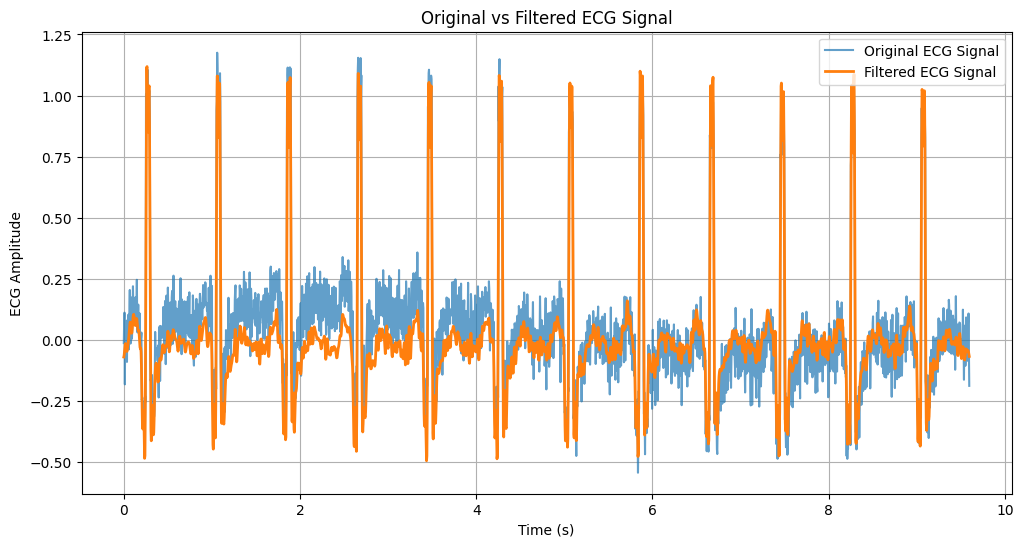

In [ ]:
# Bandpass filter to retain frequencies between 0.5 Hz and 40 Hz
#Task 3
def apply_bandpass_filter(ecg_data, sampling_rate, low_cutoff=0.5, high_cutoff=40):
    n = len(ecg_data)  # Length of the ECG data
    freq = np.fft.fftfreq(n, d=1/sampling_rate)  # Frequency array
    fft_values = fft(ecg_data)  # Compute the Fourier transform

    # Create a mask to preserve frequencies within the desired range
    mask = (np.abs(freq) >= low_cutoff) & (np.abs(freq) <= high_cutoff)
    filtered_fft_values = fft_values * mask  # Apply the mask

    # Reconstruct the filtered ECG signal using the inverse Fourier transform
    filtered_ecg = np.real(ifft(filtered_fft_values))

    return filtered_ecg

# Apply the bandpass filter
filtered_ecg = apply_bandpass_filter(ecg_data, sampling_rate=250)

# Plot the original and filtered ECG signals
time = np.arange(len(ecg_data)) / 250  # Compute time in seconds

plt.figure(figsize=(12, 6))
plt.plot(time, ecg_data, label="Original ECG Signal", alpha=0.7)
plt.plot(time, filtered_ecg, label="Filtered ECG Signal", linewidth=2)
plt.xlabel("Time (s)")
plt.ylabel("ECG Amplitude")
plt.title("Original vs Filtered ECG Signal")
plt.legend()
plt.grid(True)
plt.show()

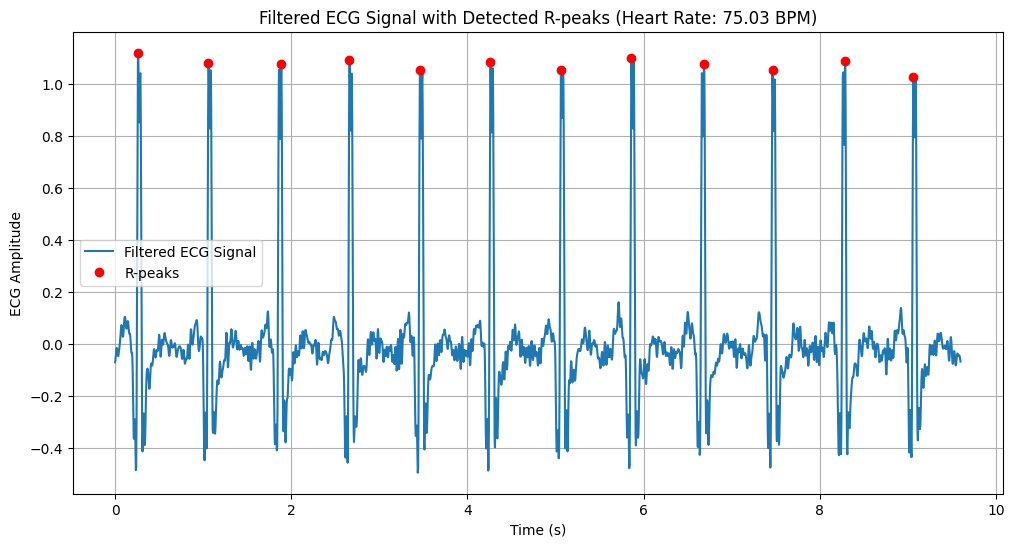

In [ ]:
#Task 4
# Calculate heart rate from the filtered ECG signal
from scipy.signal import find_peaks

def calculate_heart_rate(filtered_ecg, sampling_rate):
    # Detect R-peaks in the filtered ECG signal
    peaks, _ = find_peaks(filtered_ecg, height=0.5, distance=sampling_rate * 0.6)  # Adjust height and distance as needed

    # Calculate time intervals between successive R-peaks
    r_peak_intervals = np.diff(peaks) / sampling_rate  # Convert intervals to seconds

    # Calculate heart rate in beats per minute (BPM)
    average_interval = np.mean(r_peak_intervals)  # Average interval in seconds
    heart_rate = 60 / average_interval  # BPM

    return heart_rate, peaks

# Calculate heart rate and get R-peak indices
heart_rate, r_peaks = calculate_heart_rate(filtered_ecg, sampling_rate=250)

# Plot the filtered ECG signal with detected R-peaks
time = np.arange(len(filtered_ecg)) / 250  # Compute time in seconds

plt.figure(figsize=(12, 6))
plt.plot(time, filtered_ecg, label="Filtered ECG Signal")
plt.plot(time[r_peaks], filtered_ecg[r_peaks], 'ro', label="R-peaks")  # Mark R-peaks
plt.xlabel("Time (s)")
plt.ylabel("ECG Amplitude")
plt.title(f"Filtered ECG Signal with Detected R-peaks (Heart Rate: {heart_rate:.2f} BPM)")
plt.legend()
plt.grid(True)
plt.show()

Using a bandpass filter helped minimize noise from the ECG data by keeping frequencies within a physiological range (0.5 Hz to 40Hz). The resulting data could thus be used to detect R-peaks in the time domain, which has been indicated by red points in the figure above. The interval between peaks were then used to calculate the BPM. After analyzing our data, we found that the BPM was around 75.03 BPM. This is in the range of a normal BPM for a resting individual. 